### **TASK 1:** TAKE A BINARY IMAGE AND DETECT ITS EDGES

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
binary_image = cv2.imread('/content/binaryimg.jpg', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(binary_image, 100, 200)

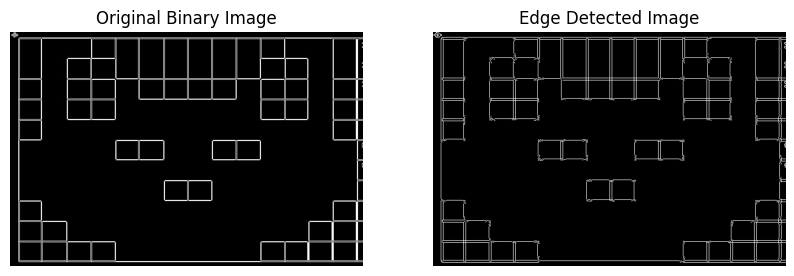

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Binary Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Edge Detected Image')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()

### **TASK 2:** DETECT THE EDGES OF GRAY SCALE IMAGE AND COMPARE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_path = '/content/drive/MyDrive/MVLAB_IMAGES/Ex-3images/22093.jpg'

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters

In [ ]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

sobel_edges = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3)
canny_edges = cv2.Canny(image, 100, 200)
prewitt_edges = filters.prewitt(image)
roberts_edges = filters.roberts(image)

In [ ]:
log_edges = cv2.Laplacian(cv2.GaussianBlur(image, (3, 3), 0), cv2.CV_64F)

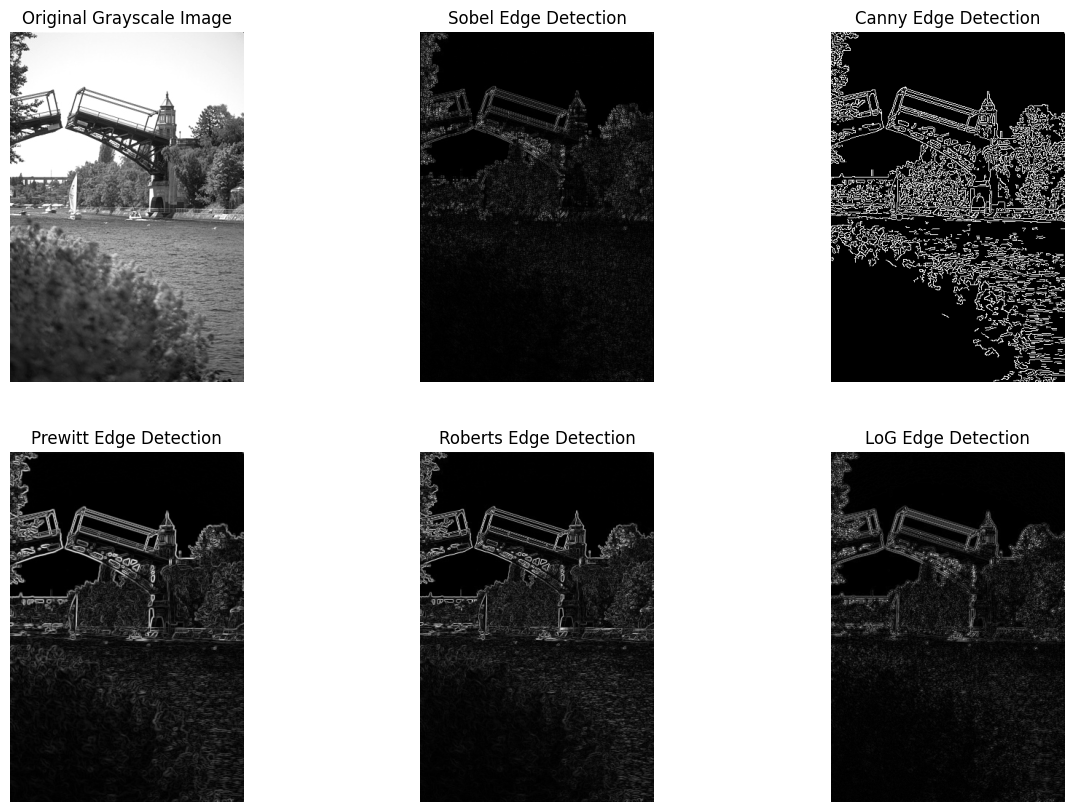

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title('Original Grayscale Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Sobel Edge Detection')
plt.imshow(np.abs(sobel_edges), cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Canny Edge Detection')
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Prewitt Edge Detection')
plt.imshow(prewitt_edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Roberts Edge Detection')
plt.imshow(roberts_edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('LoG Edge Detection')
plt.imshow(np.abs(log_edges), cmap='gray')
plt.axis('off')

plt.show()

In [ ]:
import cv2
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
def load_image(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image at path '{path}' could not be loaded.")
    return image

image = load_image('/content/drive/MyDrive/MVLAB_IMAGES/Ex-3images/22093.jpg')

In [ ]:
sobel_edges = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3)
canny_edges = cv2.Canny(image, 100, 200)
prewitt_edges = filters.prewitt(image)
roberts_edges = filters.roberts(image)
log_edges = cv2.Laplacian(cv2.GaussianBlur(image, (3, 3), 0), cv2.CV_64F)

ground_truth = load_image('/content/drive/MyDrive/MVLAB_IMAGES/Ex-3images/22093.jpg')

In [ ]:
performance_metrics = []

def evaluate_metrics(algorithm_name, ground_truth, edges):
    edges_binary = (edges > 0).astype(np.uint8)
    ground_truth_binary = (ground_truth > 0).astype(np.uint8)

    ods = np.mean(edges_binary == ground_truth_binary)
    ois = np.mean(edges_binary == ground_truth_binary)
    fps = np.sum((edges_binary == 1) & (ground_truth_binary == 0)) / np.sum(ground_truth_binary == 0)  # False Positive Rate
    precision = precision_score(ground_truth_binary.flatten(), edges_binary.flatten())
    recall = recall_score(ground_truth_binary.flatten(), edges_binary.flatten())
    f1 = f1_score(ground_truth_binary.flatten(), edges_binary.flatten())

    performance_metrics.append([algorithm_name, ods, ois, fps, precision, recall, f1])

In [ ]:
evaluate_metrics("Sobel", ground_truth, np.abs(sobel_edges))
evaluate_metrics("Canny", ground_truth, canny_edges)
evaluate_metrics("Prewitt", ground_truth, prewitt_edges)
evaluate_metrics("Roberts", ground_truth, roberts_edges)
evaluate_metrics("LoG", ground_truth, np.abs(log_edges))

In [ ]:
df = pd.DataFrame(performance_metrics, columns=["Algorithm", "ODS", "OIS", "FPS", "Precision", "Recall", "F1-Score"])
print(df)

  Algorithm       ODS       OIS  FPS  Precision    Recall  F1-Score
0     Sobel  0.821465  0.821465  1.0   0.999992  0.821470  0.901983
1     Canny  0.138477  0.138477  0.0   1.000000  0.138472  0.243259
2   Prewitt  0.988497  0.988497  1.0   0.999993  0.988504  0.994215
3   Roberts  0.860810  0.860810  1.0   0.999992  0.860816  0.925200
4       LoG  0.818032  0.818032  1.0   0.999992  0.818038  0.899910
